In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
#Datos
carga_inicial = 20
aumento_carga = 0.25

distancia_AB = 2
distancia_AD = 1
distancia_BC = 2
angulo_rad = np.arctan(distancia_AD / distancia_AB)


In [3]:
angulos_rango = np.arange(0, 190, 10)
carga_rango = np.arange(carga_inicial, carga_inicial + 19 * aumento_carga, aumento_carga)
angulos_rango, carga_rango


(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180]),
 array([20.  , 20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  ,
        22.25, 22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25,
        24.5 ]))

In [4]:
# ECUACIONES

# Fx: Ax + Dx = -Psen(angulo_p)
# Fy: Ay = -Pcos(angulo_p)
# Mc: Dx - 4Ay = 0
# NODO A:   Fx = Ax + AB + AEcos(angulo) = 0   
#           Fy = Ay - AEsen(angulo) = 0
# NODO B:   Fx = BC - AB = 0
# NODO C:   Fx = CEcos(angulo) + BC = Psen(angulo_p)   
#           Fy = CEsen(angulo) = Pcos(angulo_p)
# NODO D:   Fx = Dx + DE = 0
# NODO E:   Fx = CEcos(angulo) - AEcos(angulo) - DE = 0   
#           Fy = AEsen(angulo) + CEsen(angulo) = 0
# las fuerzas internas de los elementos AD y BE son 0.

f_max = np.array([0, 0, 0, 0, 0, 0, 0])
for angulo_p, P in zip(angulos_rango, carga_rango):
    Ay = round(- P * np.cos(angulo_p * np.pi/180), 3)
    Dx = round((distancia_AB + distancia_BC) * Ay, 3)
    Ax = round(Dx - P * np.sin(angulo_p * np.pi/180), 3)
    DE = -Dx
    AE = Ay / np.sin(angulo_rad)
    CE = P * np.cos(angulo_p * np.pi/180)
    BC = P * np.sin(angulo_p * np.pi/180) - CE * np.cos(angulo_rad)
    AB = BC
    print(f"las reacciones en [kN] para el ángulo {angulo_p} son: {Ay}, {Ax}, {Dx}")
    f_max[0] = AB if np.absolute(AB) > f_max[0] else f_max[0]
    f_max[1] = BC if np.absolute(BC) > f_max[1] else f_max[1]
    f_max[2] = CE if np.absolute(CE) > f_max[2] else f_max[2]    
    f_max[3] = DE if np.absolute(DE) > f_max[3] else f_max[3]    
    f_max[4] = AE if np.absolute(AE) > f_max[4] else f_max[4]
    print(f"las fuerzas internas [kN]para el angulo {angulo_p} son: {round(AB, 2)}, {round(BC, 2)}, {round(CE, 2)}, {round(DE, 2)}, {round(AE, 2)}"  )    
print(f"las fuerzas internas máximas son : {f_max}")

las reacciones en [kN] para el ángulo 0 son: -20.0, -80.0, -80.0
las fuerzas internas [kN]para el angulo 0 son: -17.89, -17.89, 20.0, 80.0, -44.72
las reacciones en [kN] para el ángulo 10 son: -19.942, -83.284, -79.768
las fuerzas internas [kN]para el angulo 10 son: -14.32, -14.32, 19.94, 79.77, -44.59
las reacciones en [kN] para el ángulo 20 son: -19.264, -84.067, -77.056
las fuerzas internas [kN]para el angulo 20 son: -10.22, -10.22, 19.26, 77.06, -43.08
las reacciones en [kN] para el ángulo 30 son: -17.97, -82.255, -71.88
las fuerzas internas [kN]para el angulo 30 son: -5.7, -5.7, 17.97, 71.88, -40.18
las reacciones en [kN] para el ángulo 40 son: -16.087, -77.847, -64.348
las fuerzas internas [kN]para el angulo 40 son: -0.89, -0.89, 16.09, 64.35, -35.97
las reacciones en [kN] para el ángulo 50 son: -13.659, -70.914, -54.636
las fuerzas internas [kN]para el angulo 50 son: 4.06, 4.06, 13.66, 54.64, -30.54
las reacciones en [kN] para el ángulo 60 son: -10.75, -61.62, -43.0
las fuerzas 

In [5]:
# PUNTO 2
# área en mm2 y esfuerzo en MPa
area = 1200
esf_admisible = 21

fuerza_max = area * esf_admisible / 1000
fuerza_max


25.2

In [6]:
f_internas = np.array([0, 0, 0, 0, 0])
for angulo_p, P in zip(angulos_rango, carga_rango):
    Ay = round(- P * np.cos(angulo_p * np.pi/180), 3)
    Dx = round(2 * Ay, 3)
    Ax = round(Dx - P * np.sin(angulo_p * np.pi/180), 3)
    DE = round(-Dx, 3)
    AE = Ay / np.sin(angulo_rad)
    AE = round(AE, 3)
    CE = P * np.cos(angulo_p * np.pi/180)
    CE = round(CE, 3)
    BC = P * np.sin(angulo_p * np.pi/180) - CE * np.cos(angulo_rad)
    BC = round(BC, 3)
    AB = BC
    f_internas = np.array([("AB", AB), ("BC", BC), ("CE", CE), ("DE", DE), ("AE", AE)])
    failures = np.array([i[1] for i in f_internas], dtype = np.float64)
    failures = np.where(np.absolute(failures) > fuerza_max)
    
    if len(failures) >= 1:
        print(f"La falla se encuentra con la carga {P} [kN] y con el ángulo {angulo_p}°")
        for a in failures[0]:
            carga = f_internas[a][1].astype(float)
            tipo_f = "TRACCIÓN" if carga >= 0 else "COMPRESIÓN"
            print(f"{f_internas[a][0]} falla con {carga} [kN] a {tipo_f}")
    else:
        print(f"con la carga {P} y el angulo {angulo_p} no se presentan fallas")
       
        
                  

La falla se encuentra con la carga 20.0 [kN] y con el ángulo 0°
DE falla con 40.0 [kN] a TRACCIÓN
AE falla con 44.721 [kN] a COMPRESIÓN
La falla se encuentra con la carga 20.25 [kN] y con el ángulo 10°
DE falla con 39.884 [kN] a TRACCIÓN
AE falla con 44.592 [kN] a COMPRESIÓN
La falla se encuentra con la carga 20.5 [kN] y con el ángulo 20°
DE falla con 38.528 [kN] a TRACCIÓN
AE falla con 43.076 [kN] a COMPRESIÓN
La falla se encuentra con la carga 20.75 [kN] y con el ángulo 30°
DE falla con 35.94 [kN] a TRACCIÓN
AE falla con 40.182 [kN] a COMPRESIÓN
La falla se encuentra con la carga 21.0 [kN] y con el ángulo 40°
DE falla con 32.174 [kN] a TRACCIÓN
AE falla con 35.972 [kN] a COMPRESIÓN
La falla se encuentra con la carga 21.25 [kN] y con el ángulo 50°
DE falla con 27.318 [kN] a TRACCIÓN
AE falla con 30.542 [kN] a COMPRESIÓN
La falla se encuentra con la carga 21.5 [kN] y con el ángulo 60°
La falla se encuentra con la carga 21.75 [kN] y con el ángulo 70°
La falla se encuentra con la carga 2

In [7]:
#PUNTO 3
codigo = '2200301'
L = codigo[4]
A = codigo[5]
B = codigo[6]

aumento_dist = float("0.0" + L)
distancia_AC = distancia_AB + distancia_BC

AB = A + B
AB = round(float(AB) / 10)
print(aumento_dist, AB)

0.03 0


In [8]:
for angulo_p, P in zip(angulos_rango, carga_rango):
    distancia_AB += aumento_dist
    distancia_BC += aumento_dist
    distancia_AC += aumento_dist
    angulo_rad = np.arctan(distancia_AD / distancia_AB)
    Ay = round(- P * np.cos(angulo_p * np.pi/180), 3)
    Dx = round(distancia_AC * Ay, 3)
    Ax = round(Dx - P * np.sin(angulo_p * np.pi/180), 3)
    DE = round(-Dx, 3)
    AE = round(Ay / np.sin(angulo_rad), 3)
    CE = round(P * np.cos(angulo_p * np.pi/180), 3)
    BC = round(P * np.sin(angulo_p * np.pi/180) - CE * np.cos(angulo_rad), 3)
    AB = BC
    fuerzas_normales = [('AB', AB, P), ('BC', BC, P), ('AE', AE, P), ('AE', AE, P), ('DE', DE, P)]
    print(f"Para un aumento de {round(distancia_AB - 2, 3)} las fuerzas serían:" )
    print(fuerzas_normales)      
                                                                         
      

Para un aumento de 0.03 las fuerzas serían:
[('AB', -17.941, 20.0), ('BC', -17.941, 20.0), ('AE', -45.259, 20.0), ('AE', -45.259, 20.0), ('DE', 80.6, 20.0)]
Para un aumento de 0.06 las fuerzas serían:
[('AB', -14.424, 20.25), ('BC', -14.424, 20.25), ('AE', -45.665, 20.25), ('AE', -45.665, 20.25), ('DE', 80.965, 20.25)]
Para un aumento de 0.09 las fuerzas serían:
[('AB', -10.366, 20.5), ('BC', -10.366, 20.5), ('AE', -44.633, 20.5), ('AE', -44.633, 20.5), ('DE', 78.79, 20.5)]
Para un aumento de 0.12 las fuerzas serían:
[('AB', -5.878, 20.75), ('BC', -5.878, 20.75), ('AE', -42.122, 20.75), ('AE', -42.122, 20.75), ('DE', 74.036, 20.75)]
Para un aumento de 0.15 las fuerzas serían:
[('AB', -1.088, 21.0), ('BC', -1.088, 21.0), ('AE', -38.145, 21.0), ('AE', -38.145, 21.0), ('DE', 66.761, 21.0)]
Para un aumento de 0.18 las fuerzas serían:
[('AB', 3.863, 21.25), ('BC', 3.863, 21.25), ('AE', -32.76, 21.25), ('AE', -32.76, 21.25), ('DE', 57.095, 21.25)]
Para un aumento de 0.21 las fuerzas serían:


<function matplotlib.pyplot.show(close=None, block=None)>

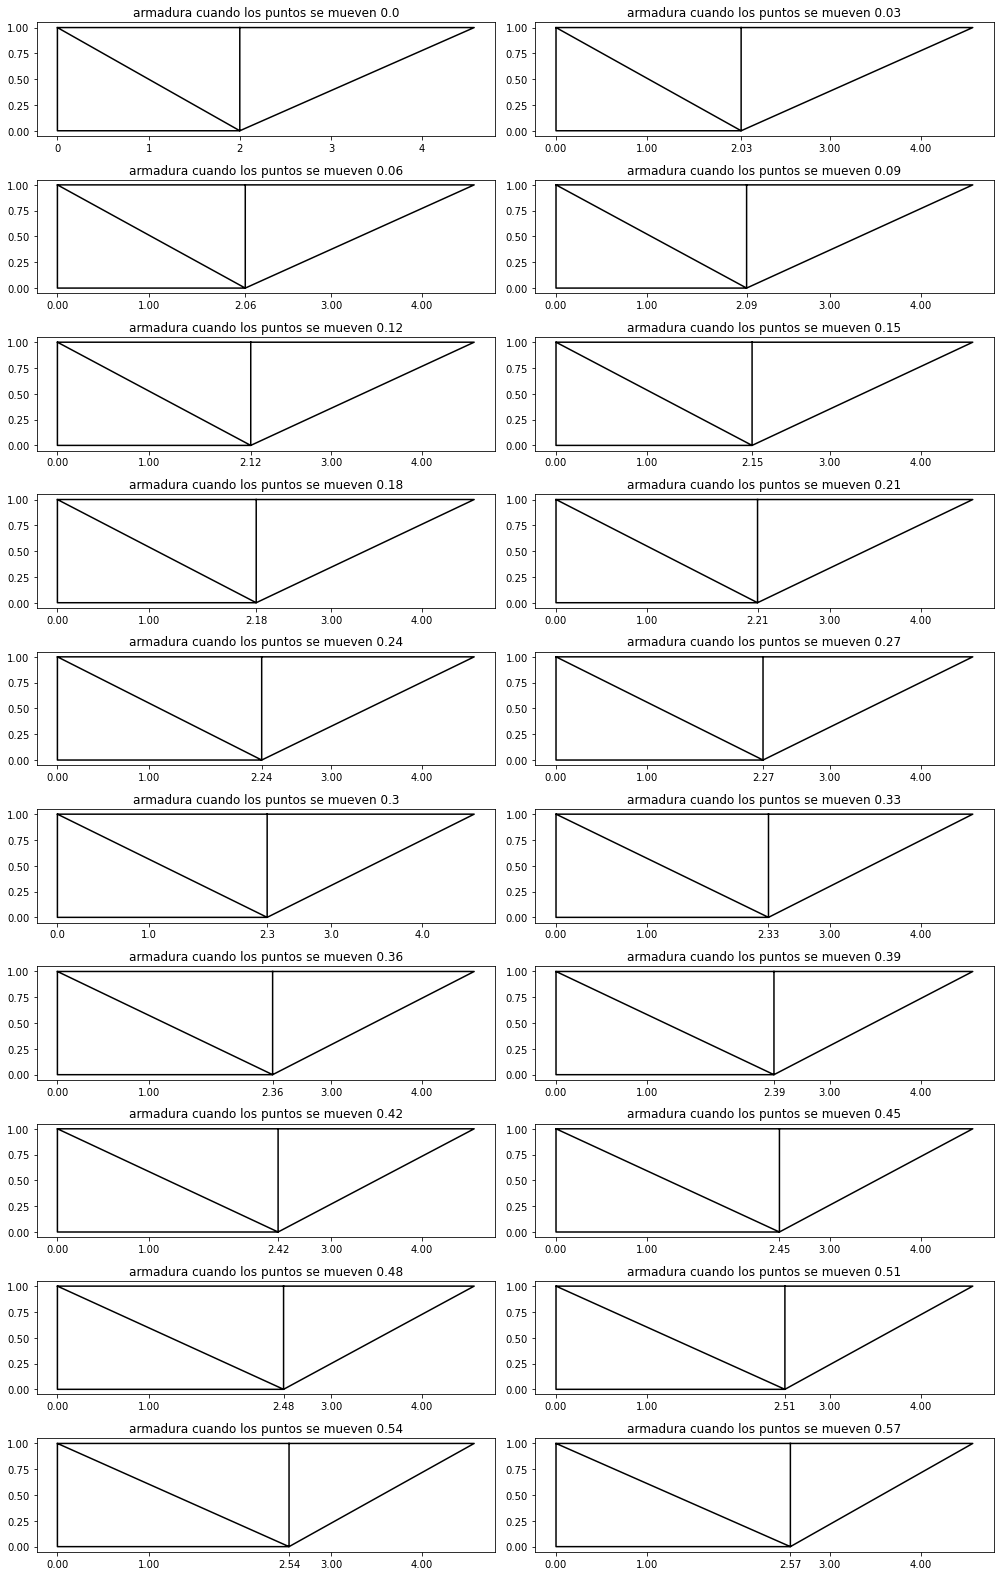

In [9]:
# PUNTO 4
cambio_dist = np.arange(2, (2 + aumento_dist) + 19 * aumento_dist, aumento_dist)
# gráfica
plt.rcParams["figure.figsize"] = (14,22)
figure, axes = plt.subplots(nrows = 10, ncols = 2)
distancia_AD = 1
for distancia_AB, ax in zip(cambio_dist, np.array(axes).flatten()):
    
    eje_x = np.array([0, distancia_AB, distancia_AC, distancia_AB, 0, 0, distancia_AB, distancia_AB])
    eje_y = np.array([distancia_AD, distancia_AD, distancia_AD, 0, 0, distancia_AD, 0, distancia_AD])
    ax.plot(eje_x, eje_y, "k")
    ax.set_xticks([distancia_AB])
    ax.set_xticks([0, 1, distancia_AB, 3, 4])
    ax.set_title(f"armadura cuando los puntos se mueven {round(distancia_AB - 2, 3)}")
plt.tight_layout()

plt.show

In [10]:
# PUNTO 5
cambio_dist = np.arange(2, (2 + aumento_dist) + 19 * aumento_dist, aumento_dist)
fuerza_AB = np.array([])
fuerza_DE = np.array([])
fuerza_BC = np.array([])
fuerza_AE = np.array([])
fuerza_CE = np.array([])
fuerza_AD = np.array([])
fuerza_BE = np.array([])
counter = 0

for distancia_AB in cambio_dist:
    carga = 20
    angulo = 0
    angulo_rad = np.arctan(distancia_AD / distancia_AB)
    Ay = round(- P * np.cos(angulo_p * np.pi/180), 3)
    Dx = round(distancia_AC * Ay, 3)
    Ax = round(Dx - P * np.sin(angulo_p * np.pi/180), 3)
    DE = round(-Dx, 3)
    AE = round(Ay / np.sin(angulo_rad), 3)
    CE = round(P * np.cos(angulo_p * np.pi/180), 3)
    BC = round(P * np.sin(angulo_p * np.pi/180) - CE * np.cos(angulo_rad), 3)
    AB = BC
    BE = 0
    AD = 0
    fuerza_AB = np.append(fuerza_AB, AB)
    fuerza_DE = np.append(fuerza_DE, DE)
    fuerza_BC = np.append(fuerza_BC, BC)
    fuerza_AE = np.append(fuerza_AE, AE)
    fuerza_CE = np.append(fuerza_CE, CE)
    fuerza_AD = np.append(fuerza_AD, AD)
    fuerza_BE = np.append(fuerza_BE, BE)
    if counter == 5:
        print(f"las reacciones con un angulo de {angulo} son: ")
        print(Ax, Ay, Dx)
        print(f"las fuerzas internas con un angulo de {angulo} son: ")
        print(AB, DE, BC, AE, CE, AD, BE)
    counter = counter + 1
    
    

las reacciones con un angulo de 0 son: 
111.965 24.5 111.965
las fuerzas internas con un angulo de 0 son: 
22.215 -111.965 22.215 58.094 -24.5 0 0


<function matplotlib.pyplot.show(close=None, block=None)>

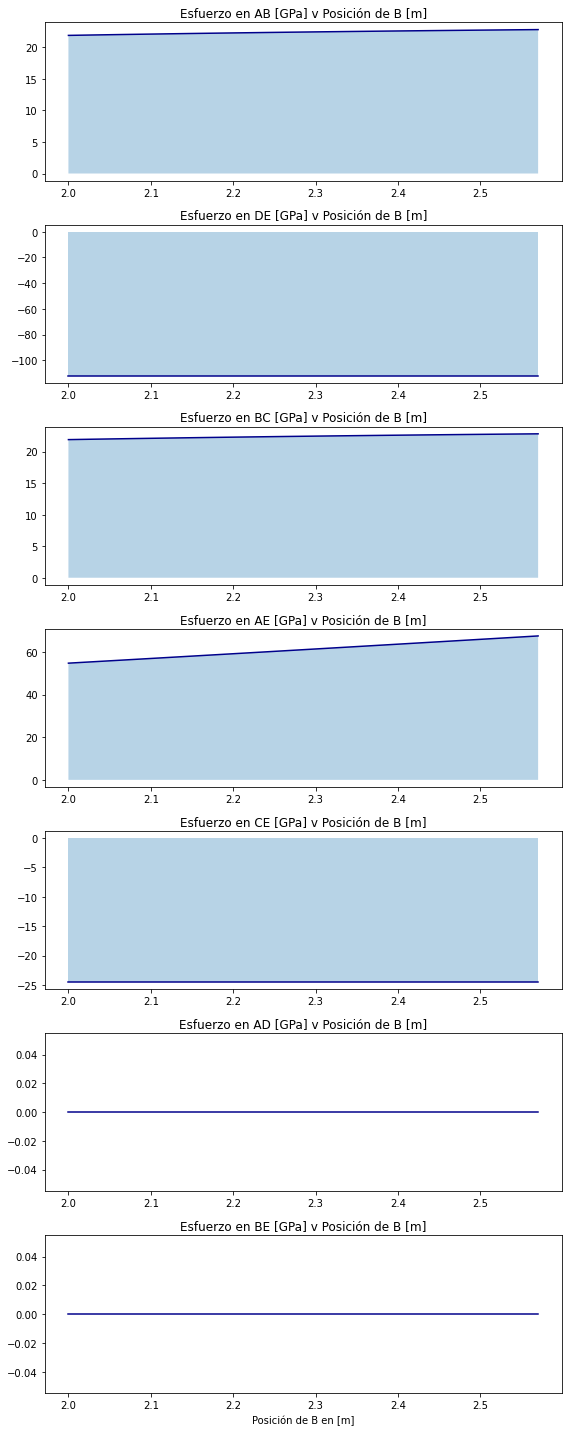

In [11]:
# gráfica
plt.rcParams["figure.figsize"] = (8,20)
fuerzas_internas = [
    (fuerza_AB, "AB"),
    (fuerza_DE, "DE"),
    (fuerza_BC, "BC"),
    (fuerza_AE, "AE"),
    (fuerza_CE, "CE"),
    (fuerza_AD, "AD"),
    (fuerza_BE, "BE")
]
figure, axes = plt.subplots(nrows=7, ncols=1)

for f, ax in zip(fuerzas_internas, axes):
    ax.plot(cambio_dist, f[0], "darkblue")
    ax.fill_between(cambio_dist, f[0], alpha = 0.32)
    ax.set_title(f"Esfuerzo en {f[1]} [GPa] v Posición de B [m]")
ax.set_xlabel('Posición de B en [m]')
plt.tight_layout()
plt.show